In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

# Reading in images
We will load each image not in its color RBG format, but grayscale. This is for several reasons:

- Color is not a key differentiating factor between cats and dogs, so it is irrelevant information.

- Grayscale images are 1/3rd the size of RBG. RBG images are have 3 layers for R, G and B each containing a full 2D matrix, while Grayscale images only have only layer with the numbers showing the brightness of each pixel (0:Dark - 255:Bright).

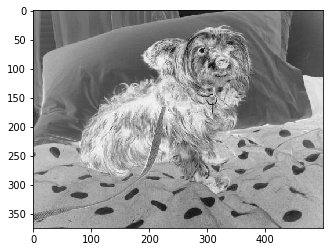

In [2]:
DATA_DIR = "Data\MS Pet Images"
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    # Path of the specific folder
    path = os.path.join(DATA_DIR, category)
    
    # Each image in the folder directory
    for img in os.listdir(path):
        
        # Reading in the image file as an matrix (ndarray)
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        
        # Displyaing image matrix
        plt.imshow(img_array, cmap=plt.cm.binary)
    # We will check only the first photo (later we will make a function out of this)
        break
    break

In [3]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


# Resizing images
There are two main reasons to resize the images
1. Now, all the images are of different sizes, so we will make them all smaller square images.

2. This is also to reduce the total size of our dataset. A full 1200x800 image has 960,000 pixes, which is huge!

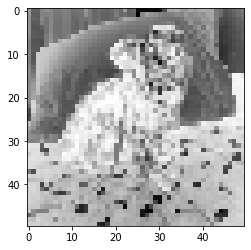

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='Greys')

# Defining a function to read image data

In [5]:
training_data = []

def create_training_data():
    """
    A function to read in image data, and return a list of lists,
    each entry containing the image as an array and the numerical
    label value of that image (eg: 0=Dog, 1=Cat).
    
    The function expects the image data to be seperated by their 
    categories into seperate folders.
    """
    for category in CATEGORIES:
        # Path of the specific folder
        path = os.path.join(DATA_DIR, category)
        
        # Getting the label as a number
        class_num = CATEGORIES.index(category)
        
        # Each image in the folder directory
        for img in os.listdir(path):
            try:
                # Reading in the image file as an matrix (ndarray)
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Resizing to reduce size
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                # Adding image data to list
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

# Calling the function we just defined and showing the length
create_training_data()
print("Length of training data:", len(training_data))

Length of training data: 24946


# Shuffling Training Data
Right now our data set is ordered: first alot of images of dogs, then alot of images of cats. This will lead our neural network astray. First it will learn to predict dog all the time, then it will shift to predicting cat all the time, and so on.

So we will shuffle our training data to solve this problem:

In [6]:
import random

In [11]:
# Shuffling training data
random.shuffle(training_data)

# Shoing the first 500 labels
for i, sample in enumerate(training_data):
    print(sample[1], end=" ")
    if i > 500:
        break

1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 

# Setting feature and labels

In [15]:
X = []
y = []

In [16]:
for feature, label in training_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Saving the dataset

In [17]:
import pickle

In [19]:
with open("X.pickle", 'wb') as pickle_out:
    pickle.dump(X, pickle_out)

Loading it again to show:

In [20]:
pickle_in = open("X.pickle", 'rb')
X = pickle.load(pickle_in)
pickle_in.close()

In [21]:
X[0]

array([[[ 26],
        [ 29],
        [ 25],
        ...,
        [155],
        [ 92],
        [ 91]],

       [[ 27],
        [ 39],
        [ 30],
        ...,
        [176],
        [ 89],
        [ 52]],

       [[ 12],
        [ 30],
        [ 21],
        ...,
        [151],
        [ 89],
        [ 86]],

       ...,

       [[108],
        [110],
        [113],
        ...,
        [ 57],
        [ 97],
        [100]],

       [[111],
        [108],
        [114],
        ...,
        [ 96],
        [ 80],
        [100]],

       [[114],
        [117],
        [114],
        ...,
        [ 84],
        [ 60],
        [ 74]]], dtype=uint8)